# Proyecto 1: Analítica computacional para la toma de decisiones
Carolina Rodríguez

Gabriela Martínez

Wilmar Calderón

Tarea 2: Alistamiento de Datos

In [123]:
#Importation of all the relevant Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [124]:
#Reading of the comma delimited text
df=pd.read_csv('.\\data.txt')

In [125]:
#Preliminary view of the data (top 5 registers)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [126]:
#Statistical description of all the variables
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [127]:
## Study to determine if there are duplicates or null values.
    # no. of duplicates 
duplicates = len(df[df.duplicated()])
    # no of missing values
missing_values = df.isnull().sum().sum()

## Review of the varibles types.
# Data types in dataset
types = df.dtypes.value_counts()

In [128]:
#Print of the results: definition of duplicate numbers, missing values, number of registers and features (rows x columns)
print('Number of Duplicate Entries: %d'%(duplicates))
print('Number of Missing Values: %d'%(missing_values))
print('Number of Features: %d'%(df.shape[1]))
print('Number of Registers: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Duplicate Entries: 0
Number of Missing Values: 506
Number of Features: 15
Number of Registers: 1197
Data Types and Frequency in Dataset:
float64    6
int64      5
object     4
Name: count, dtype: int64


In [129]:
#Identification of the column that has null values
cols=df.columns.values
for col in cols:
    if (df[col].isnull().sum()>0):
        print(col)

wip


*wip:* Trabajo en progreso. Incluye la cantidad de elementos sin terminar.

In [132]:
#Indexation of the rows where wip is null and the incentive is 0. Incentive>0 for wip==null identified as outliers
dropable=df[(df['wip'].isnull()) & (df['incentive']>0)]
print(dropable.index.values)
#Dropping of the rows with outlier
df_fin=df
df_fin.iloc[dropable.index.values,8]=df.iloc[dropable.index.values,9]
df_fin.iloc[dropable.index.values,9]=0

print(df.tail(60))
#modification of null to 0 in the wip. From the variable characteristic, as it relates to the missing products to be finished, 
#an empty value would be considered as 0.
df_fin['wip'].fillna(0, inplace=True)

[]
           date   quarter department        day  team  targeted_productivity  \
1137   3/9/2015  Quarter2  finishing     Monday     3                   0.80   
1138   3/9/2015  Quarter2  finishing     Monday     4                   0.75   
1139   3/9/2015  Quarter2  finishing     Monday     1                   0.75   
1140   3/9/2015  Quarter2     sweing     Monday     9                   0.75   
1141   3/9/2015  Quarter2     sweing     Monday     2                   0.70   
1142   3/9/2015  Quarter2     sweing     Monday    10                   0.70   
1143   3/9/2015  Quarter2  finishing     Monday     2                   0.70   
1144   3/9/2015  Quarter2     sweing     Monday     6                   0.65   
1145   3/9/2015  Quarter2     sweing     Monday     8                   0.65   
1146   3/9/2015  Quarter2     sweing     Monday     5                   0.60   
1147   3/9/2015  Quarter2     sweing     Monday     7                   0.50   
1148   3/9/2015  Quarter2  finishing 

In [ ]:
# review for no of missing values
missing_values = df_fin.isnull().sum().sum()
print('Number of Missing Values: %d'%(missing_values))

Number of Missing Values: 0


In [ ]:
#Update of the datatypes of the dataframe. Date: datetime, no_of_workers: int, department is cleared from any space to avoid multiple categories.
df_fin['date']= pd.to_datetime(df_fin['date'])
df_fin['no_of_workers']=df_fin['no_of_workers'].astype(int)
df_fin['department'] = df_fin['department'].str.strip()

In [ ]:
#Print details of the variables
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

Tarea 3: Exploración de Datos

In [ ]:
#description of the loaded data (null values eliminated)
df_fin.describe()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,687.228070,4579.991646,25.679198,0.730159,0.369256,0.150376,34.551378,0.735091
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,3.463963,0.097891,10.943219,1514.582341,3335.480597,30.375119,12.709757,3.268987,0.427848,22.152559,0.174488


['targeted_productivity' 'smv' 'wip' 'over_time' 'incentive' 'idle_time'
 'idle_men' 'no_of_style_change' 'no_of_workers' 'actual_productivity']


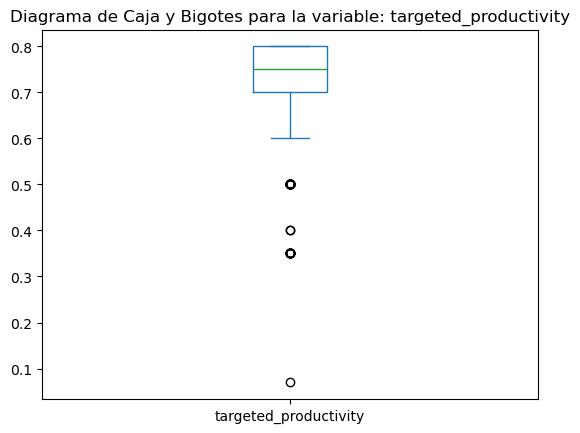

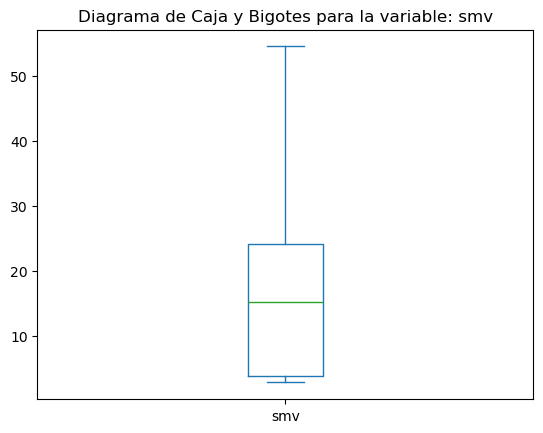

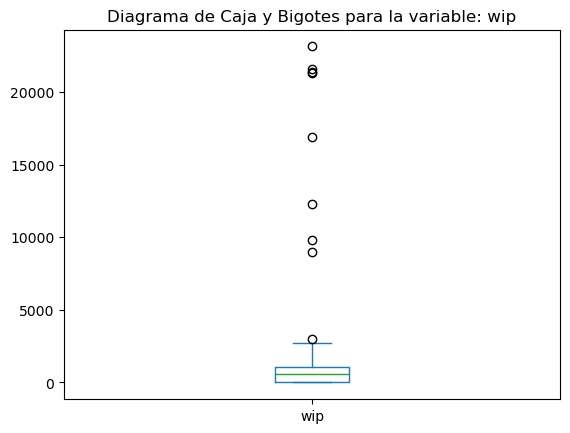

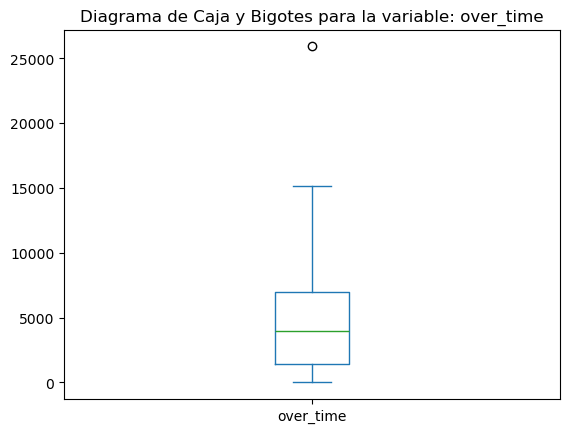

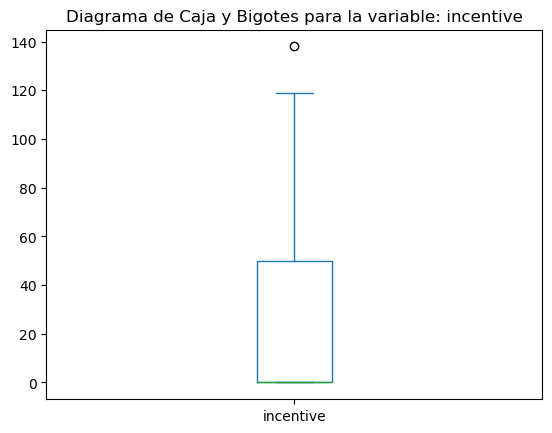

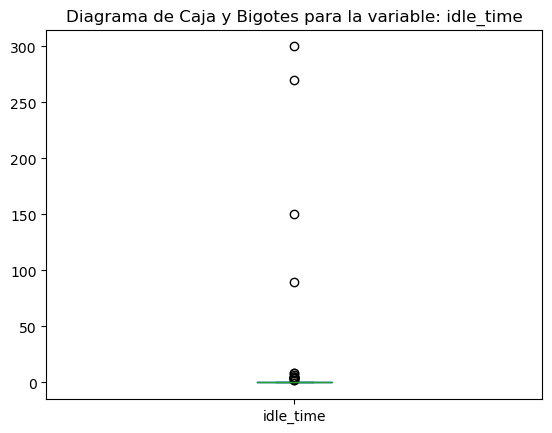

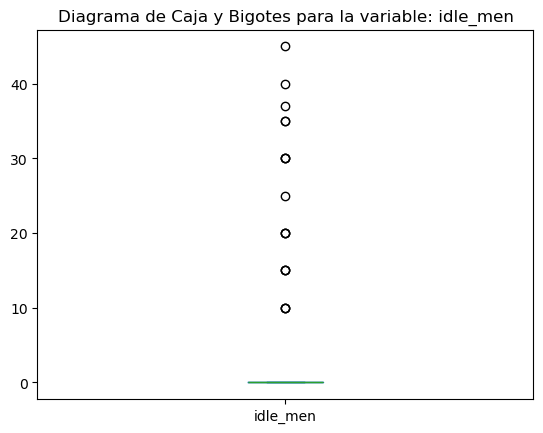

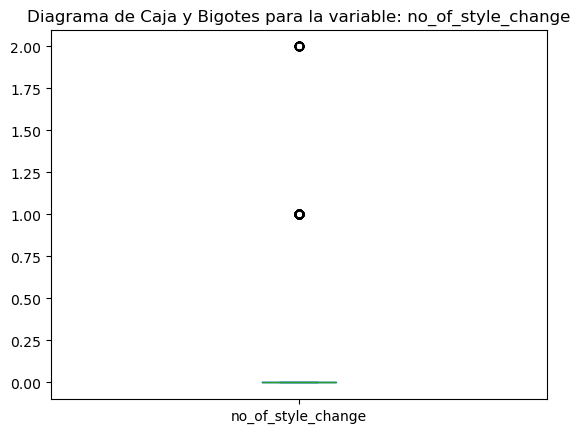

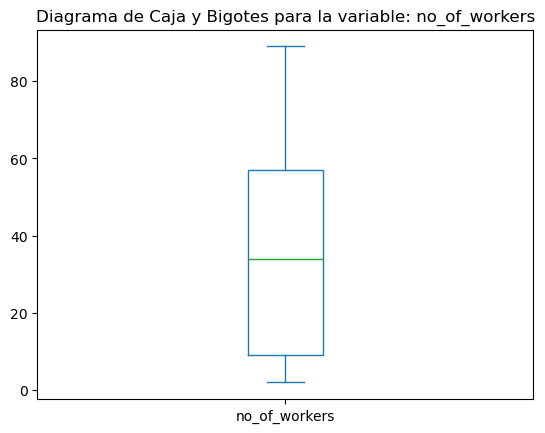

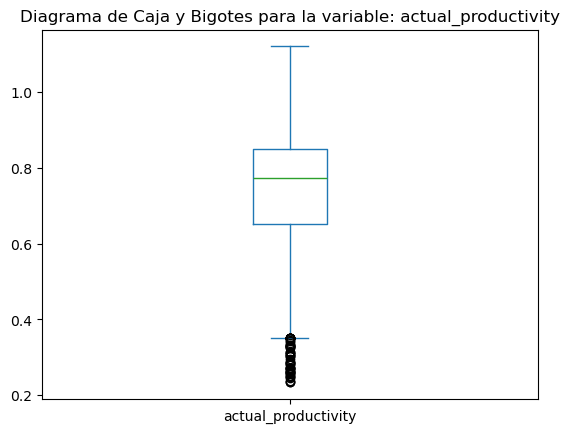

In [ ]:
#creation of the box-whiskers plots for the numerical variables.
cols=df_fin.columns.values
cols=np.delete(cols,[0,1,2,3,4])
print(cols)
for col in cols:
    plt.figure()
    df_fin[col].plot(kind="box")
    plt.title("Diagrama de Caja y Bigotes para la variable: "+col)

In [ ]:
#Groupby the date (day) to understand how different variables changes during time
daily_data=df_fin.groupby("date")

<Axes: xlabel='date'>

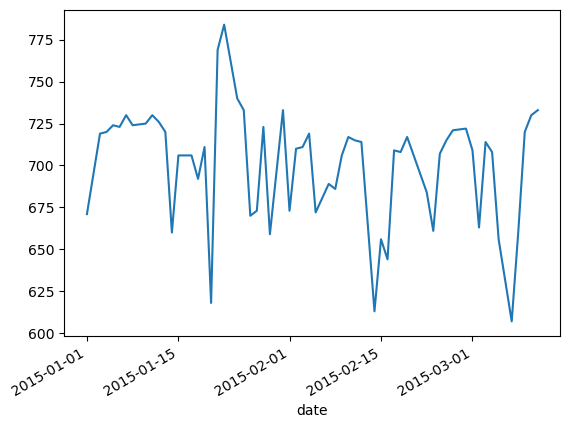

In [ ]:
#review of quantity of workers during the time lapse studied
no_of_work=daily_data.sum()['no_of_workers']
no_of_work.plot()

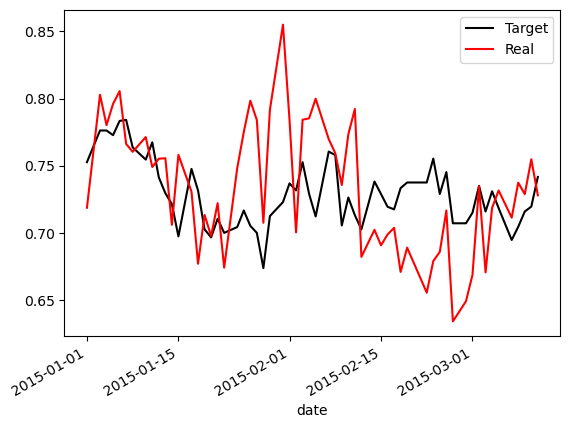

In [ ]:
#comparisson between the targeted and the real productivity in the dates studied
target_eff=daily_data['targeted_productivity'].mean()
real_eff=daily_data['actual_productivity'].mean()
plt.figure()
target_eff.plot(c="black", label="Target")
real_eff.plot(c="red", label="Real")
plt.legend()
plt.show()

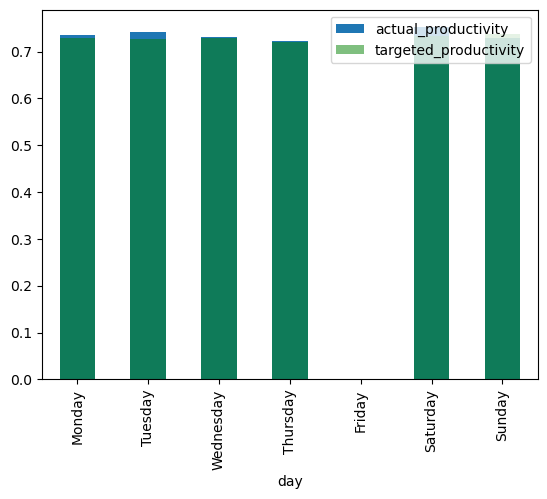

In [ ]:
#Review of efficiencies during the week days (average efficiencies)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_data=df_fin.groupby("day")
real_eff_w=weekly_data['actual_productivity'].mean().reindex(cats)
target_eff_w=weekly_data['targeted_productivity'].mean().reindex(cats)

plt.figure()
real_eff_w.plot(kind="bar")
target_eff_w.plot(kind="bar",color="green",alpha=0.5)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Number of activities performed')

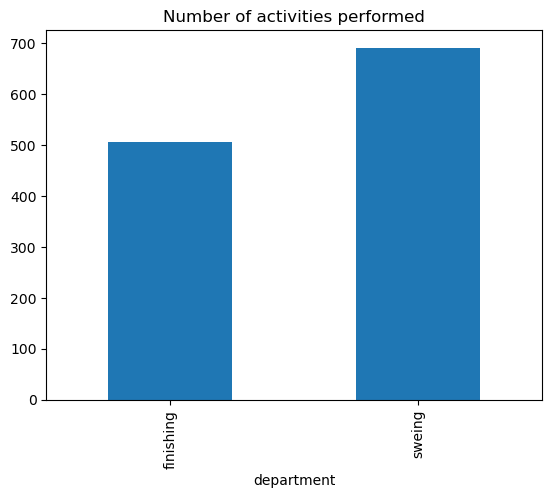

In [ ]:
#comparisson of registers from the different activities performed
tasks=df_fin.groupby("department").count()

plt.figure()
tasks["team"].plot(kind="bar")
plt.title("Number of activities performed")

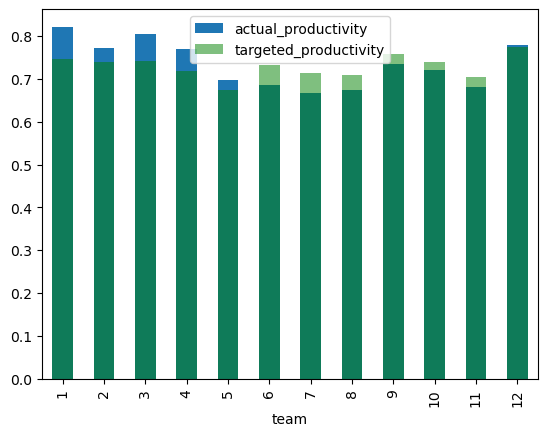

In [ ]:
#Review of efficiencies during the week days (average efficiencies)

team_data=df_fin.groupby("team")
real_eff_t=team_data['actual_productivity'].mean()
target_eff_t=team_data['targeted_productivity'].mean()

plt.figure()
real_eff_t.plot(kind="bar")
target_eff_t.plot(kind="bar",color="green",alpha=0.5)
plt.legend()
plt.show()

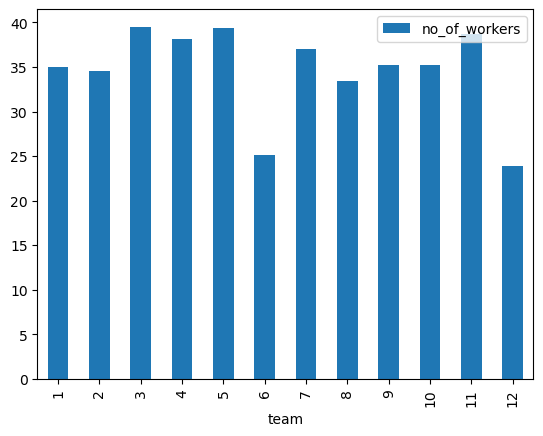

In [ ]:
#Review of efficiencies during the week days (average efficiencies)

team_data=df_fin.groupby("team")
real_eff_t=team_data['no_of_workers'].mean()

plt.figure()
real_eff_t.plot(kind="bar")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
df_val=df_fin.select_dtypes(exclude=['object'])
sns.pairplot(df_val)

SyntaxError: invalid syntax (2123317101.py, line 2)